# Data Scientist's Blog Post - Business Questions Answered

We have come up with a set of business questions which we will answer with help of chosen dataset. All these question are to be answered using a subset of our dataset - US resident full-time Database administrators.


## Data Science Process Remining Steps 
In this notebook we will be covering applicable Data Science Process steps from:
- Clean
- Model
- Visualize

## Business Questions
In this note, we will be dealing with a few business questions and answer them using the selected dataset. These Business Questions are:
- Q1: Does Job Satisfaction depend on Organization Type?
- Q2: Is there any correlation between Salary and Job Satisfaction?
- Q3: Does better Work Equipment lead to higher Job Satisfaction?
- Q4: When an employer trusts its employees, does that benefit the employer too?


## Important Points to Note
- Stack Overflow 2017 survey data for US resident, full-time employees, working as Database administrators were used for finding answers to the Business Questions. 
- We also found answers for Web Developer and Mobile Developer data sets and found slightly different answers.

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

from pandas.core.common import SettingWithCopyWarning
warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)

%matplotlib inline 

pd.set_option('display.max_columns', 25)
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_colwidth', None)


In [2]:
# Global flags 
go_debug = True # Debug messages only when set to True
go_impute = False # Data imputation happens only when set to True

# Global constants 

# Constant for filtering survery records on DeveloperType column
PATTERN = 'Database administrator'  

## Gather necessary data 
We need to gather Stack Overflow Survey data.

In [3]:
# Read data from Survey Results data file
df = pd.read_csv('./survey_results_public.csv')

df.head()

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,CompanyType,YearsProgram,...,StackOverflowBetter,StackOverflowWhatDo,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,NaN,2 to 3 years,...,Strongly agree,Strongly agree,Strongly disagree,Male,High school,White or of European descent,Strongly disagree,Strongly agree,Disagree,Strongly agree,NaN,NaN
1,2,Student,"Yes, both",United Kingdom,"Yes, full-time",Employed part-time,Some college/university study without earning a bachelor's degree,Computer science or software engineering,"More than half, but not all, the time",20 to 99 employees,"Privately-held limited company, not in startup mode",9 to 10 years,...,Strongly agree,Strongly agree,Strongly disagree,Male,A master's degree,White or of European descent,Somewhat agree,Somewhat agree,Disagree,Strongly agree,NaN,37500.0
2,3,Professional developer,"Yes, both",United Kingdom,No,Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day each week","10,000 or more employees",Publicly-traded corporation,20 or more years,...,Agree,Agree,Disagree,Male,A professional degree,White or of European descent,Somewhat agree,Agree,Disagree,Agree,113750.0,NaN
3,4,Professional non-developer who sometimes writes code,"Yes, both",United States,No,Employed full-time,Doctoral degree,A non-computer-focused engineering discipline,"Less than half the time, but at least one day each week","10,000 or more employees",Non-profit/non-governmental organization or private school/university,14 to 15 years,...,Agree,Strongly agree,Disagree,Male,A doctoral degree,White or of European descent,Agree,Agree,Somewhat agree,Strongly agree,NaN,NaN
4,5,Professional developer,"Yes, I program as a hobby",Switzerland,No,Employed full-time,Master's degree,Computer science or software engineering,Never,10 to 19 employees,"Privately-held limited company, not in startup mode",20 or more years,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Determine Number of rows and columns in the dataset

In [4]:
# Number of rows and columns in the input dataset
print(f'The input data file has {df.shape[0]} rows and {df.shape[1]} columns')

The input data file has 19102 rows and 154 columns


# Data Science Process Step - Clean
We will create a curated dataset for answering our business questions. This would be done suitably applying some of the concepts stated below:
- change column names to business friendly names
- change the data values to make suitable for presentation
- change data values for answering business questions
- add new columns with mapped data values

## Important Notes
We need to exclude the following columns from imputing. We will take care of removing null values before the consumption, e.g., visualization, modelling
- Respondent
- Job Satisfaction
- Career Satisfaction
- Salary Amount
- Job Hunting Time


In [5]:
# Define a few dictionaries, to be used for data wrangling etc.

# Dictionary for Creating more readable data names
DATA_NAME_MAP = {'Respondent': 'Respondent',
                 'Professional': 'Professional Type',
                 'DeveloperType': 'Developer Type',
                 'CompanyType': 'Organization Type',
                 'EmploymentStatus': 'Employment Status',
                 'Country': 'Country Name',
                 'JobSatisfaction': 'Job Satisfaction', 
                 'CareerSatisfaction': 'Career Satisfaction', 
                 'Salary': 'Salary Amount', 
                 'HoursPerWeek': 'Job Hunting Time',
                 'JobSeekingStatus': 'Job Seeking Status'
                }

# Data dictionary for mapping long Company Type values to more managable ones
ORG_TYP_MAP = {"Privately-held limited company, not in startup mode": "Private Limited Company", \
               "Publicly-traded corporation": "Public Corporation", \
               "I don't know": "Unknown", \
               "Sole proprietorship or partnership, not in startup mode": "Sole Prop/Partnership", \
               "Venture-funded startup": "Venture Funded Startup", \
               "Government agency or public school/university": "Government Organization", \
               "I prefer not to answer": "Not Answered", \
               "Pre-series A startup": "Pre-Series A Startup", \
               "Non-profit/non-governmental organization or private school/university": "Non-profit/Non-Govt Org", \
               "State-owned company": "State Owned Orgs", \
               "Something else": "Other Organizations"
              }

# Dita dictionary for mapping Satisfaction Level textual values to 1-5 scale
SAT_LVL_MAP = {"Not at all satisfied": 1,
               "Not very satisfied": 2,
               "Somewhat satisfied": 3,
               "Satisfied": 4,
               "Very satisfied": 5
              }

# Data dictionary for mapping Influence Level textual values to 1-5 scale
INFL_LVL_MAP = {"No influence at all": 1,
                "Not much influence": 2,
                "Some influence": 3,
                "A lot of influence": 4,
                "I am the final decision maker": 5
}

# Data dictionary for mapping Job Seeking Status textual values to 1 - 3 scale
JOB_SEEK_STA_MAP = {"I am not interested in new job opportunities": 1,
                    "I'm not actively looking, but I am open to new opportunities": 2,
                    "I am actively looking for a job": 3}

# Candidate columns for imputation 
IMPUTE_CATG_COLS = ['EquipmentSatisfiedMonitors', 'EquipmentSatisfiedCPU', 'EquipmentSatisfiedRAM', \
                    'EquipmentSatisfiedStorage', 'EquipmentSatisfiedRW', 'InfluenceInternet', \
                    'InfluenceWorkstation', 'InfluenceHardware', 'InfluenceServers', 'InfluenceTechStack', \
                    'InfluenceDeptTech', 'InfluenceVizTools', 'InfluenceDatabase', 'InfluenceCloud', \
                    'InfluenceConsultants', 'InfluenceRecruitment', 'InfluenceCommunication']

# All columns of Job Satisfaction (js) dataframe
JS_ALL_COLS = ['Respondent', 'Professional', 'DeveloperType', 'CompanyType', 'EmploymentStatus', \
               'Country', 'JobSatisfaction', 'CareerSatisfaction', 'Salary', 'HoursPerWeek', \
               'EquipmentSatisfiedMonitors', 'EquipmentSatisfiedCPU', 'EquipmentSatisfiedRAM', \
               'EquipmentSatisfiedStorage', 'EquipmentSatisfiedRW', 'InfluenceInternet', \
               'InfluenceWorkstation', 'InfluenceHardware', 'InfluenceServers', 'InfluenceTechStack', \
               'InfluenceDeptTech', 'InfluenceVizTools', 'InfluenceDatabase', 'InfluenceCloud', \
               'InfluenceConsultants', 'InfluenceRecruitment', 'InfluenceCommunication', 'JobSeekingStatus']


In [6]:
def clean_and_transform_df(df, pattern=PATTERN):
    """
    This routine cleans and transforms input dataframe to a much smaller and usable dataframe js_df
    
    INPUT
    - df - input dataframe
    - pattern - pattern to be matched
    
    OUTPUT
    - js_df - Job Satisfaction data frame
    """
    
    # Create new dataset using easy to read name, data value transformation, create new statistic values
    # If we need to run model, we will handle null values before modeling
    
    mask = df[['DeveloperType']].apply(lambda col:col.str.contains(pattern, na=False, case=False)).any(axis=1)
    js_df = df[mask].loc[(df['EmploymentStatus']=='Employed full-time') & \
                         (df['Country']=='United States')] \
                        [JS_ALL_COLS].copy()
    
    # Rename columns to presentation friendly names 
    js_df.rename(columns=DATA_NAME_MAP, inplace=True)

    # Fill missing categorical values with mode of the column - only if go_impute is set to True
    if go_impute:
        for col in IMPUTE_CATG_COLS:
            js_df[col].fillna(js_df[col].mode(), inplace=True)
    
    # Transform data values of the following columns to more readable, and compute-friendly data values
    js_df.replace({"Organization Type": ORG_TYP_MAP}, inplace=True)
    js_df.replace({"EquipmentSatisfiedMonitors": SAT_LVL_MAP}, inplace=True)
    js_df.replace({"EquipmentSatisfiedCPU": SAT_LVL_MAP}, inplace=True)
    js_df.replace({"EquipmentSatisfiedRAM": SAT_LVL_MAP}, inplace=True)
    js_df.replace({"EquipmentSatisfiedStorage": SAT_LVL_MAP}, inplace=True)
    js_df.replace({"EquipmentSatisfiedRW": SAT_LVL_MAP}, inplace=True)
    js_df.replace({"InfluenceInternet": SAT_LVL_MAP}, inplace=True)
    js_df.replace({"InfluenceWorkstation": INFL_LVL_MAP}, inplace=True)
    js_df.replace({"InfluenceHardware": INFL_LVL_MAP}, inplace=True)
    js_df.replace({"InfluenceServers": INFL_LVL_MAP}, inplace=True)
    js_df.replace({"InfluenceTechStack": INFL_LVL_MAP}, inplace=True)
    js_df.replace({"InfluenceDeptTech": INFL_LVL_MAP}, inplace=True)
    js_df.replace({"InfluenceVizTools": INFL_LVL_MAP}, inplace=True)
    js_df.replace({"InfluenceDatabase": INFL_LVL_MAP}, inplace=True)
    js_df.replace({"InfluenceCloud": INFL_LVL_MAP}, inplace=True)
    js_df.replace({"InfluenceConsultants": INFL_LVL_MAP}, inplace=True)
    js_df.replace({"InfluenceRecruitment": INFL_LVL_MAP}, inplace=True)
    js_df.replace({"InfluenceCommunication": INFL_LVL_MAP}, inplace=True)
    js_df.replace({"Job Seeking Status": JOB_SEEK_STA_MAP}, inplace=True)

    # Compute new metric: Equipment Satisfaction Score 
    # Measures employees satisfaction with the work equipment, Scale: 1 - 5 
    js_df['Equipment Satisfaction Score'] = (js_df['EquipmentSatisfiedMonitors'] + \
                                             js_df['EquipmentSatisfiedCPU'] + \
                                             js_df['EquipmentSatisfiedRAM'] + \
                                             js_df['EquipmentSatisfiedStorage'] + \
                                             js_df['EquipmentSatisfiedRW']) / 5

    # Compute new metric: Trust Score 
    # Measures to what degree the employee is trusted by the employer, Scale: 1 - 5 
    js_df['Trust Score'] = (js_df['InfluenceInternet'] + \
                            js_df['InfluenceWorkstation'] + \
                            js_df['InfluenceHardware'] + \
                            js_df['InfluenceServers'] + \
                            js_df['InfluenceTechStack'] + \
                            js_df['InfluenceDeptTech'] + \
                            js_df['InfluenceVizTools'] + \
                            js_df['InfluenceDatabase'] + \
                            js_df['InfluenceCloud'] + \
                            js_df['InfluenceConsultants'] + \
                            js_df['InfluenceRecruitment'] + \
                            js_df['InfluenceCommunication']) / 12
    
    # Drop intermediate columns used for computing Equipment Satisfaction Score and Trust Score
    # In debug mode these columns are retained for testing
    if not go_debug:
        js_df = js_df.drop(IMPUTE_CATG_COLS, axis=1).copy()

    # Return the Job Satisfaction dataframe
    return js_df


In [7]:
# Clean and transform df to js_df
js_df = clean_and_transform_df(df, PATTERN)


In [8]:
js_df.shape

(362, 30)

In [9]:
js_df[:5]

,Respondent,Professional Type,Developer Type,Organization Type,Employment Status,Country Name,Job Satisfaction,Career Satisfaction,Salary Amount,Job Hunting Time,EquipmentSatisfiedMonitors,EquipmentSatisfiedCPU,...,InfluenceServers,InfluenceTechStack,InfluenceDeptTech,InfluenceVizTools,InfluenceDatabase,InfluenceCloud,InfluenceConsultants,InfluenceRecruitment,InfluenceCommunication,Job Seeking Status,Equipment Satisfaction Score,Trust Score
96,97,Professional developer,Web developer; Desktop applications developer; Database administrator; Systems administrator; DevOps specialist; Quality assurance engineer,Government Organization,Employed full-time,United States,6.0,8.0,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN
155,156,Professional developer,Web developer; Mobile developer; Database administrator; Systems administrator,Private Limited Company,Employed full-time,United States,10.0,10.0,NaN,NaN,5.0,5.0,...,4.0,4.0,5.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,5.0,2.750000
169,170,Professional developer,Web developer; Database administrator; Systems administrator; DevOps specialist,Private Limited Company,Employed full-time,United States,5.0,7.0,100000.0,NaN,4.0,3.0,...,5.0,5.0,5.0,5.0,5.0,4.0,5.0,5.0,5.0,NaN,3.8,4.666667
177,178,Professional developer,Web developer; Mobile developer; Developer with a statistics or mathematics background; Desktop applications developer; Database administrator; Systems administrator; DevOps specialist,Private Limited Company,Employed full-time,United States,10.0,10.0,120000.0,NaN,5.0,5.0,...,5.0,5.0,5.0,5.0,5.0,5.0,5.0,4.0,5.0,NaN,4.2,4.583333
207,208,Professional developer,Web developer; Database administrator; Other,Government Organization,Employed full-time,United States,4.0,7.0,NaN,1.0,5.0,5.0,...,2.0,2.0,3.0,2.0,2.0,3.0,2.0,1.0,2.0,2.0,5.0,2.416667


## Find Correlation between Job Satisfaction and other numerical columns
We observe here that Job Satisfaction and Career Satisfaction are strongly correlated. Since they are very similar concepts, we will be focusing on Job Satisfaction (and somewhat ignore Career Satisfaction) and find it's association with other data. 

The visualization is based on complete data, before any filtering is applied. From the heatmap below, we get a general sense of how different numerical columns are correlated to each other. We also take this opportunity to normalize the column names.

Later, in this notebook, we will be addressing business questions raised above.

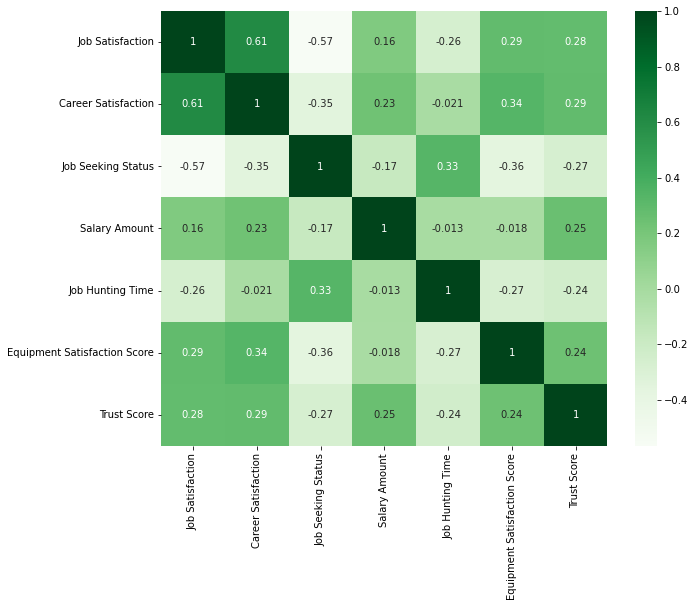

In [10]:
# Correlation between Job Satisfaction, Career Satisfaction, Salary amount, Job Hunting Time, 
# Equipment Score, and Trust Score

# Columns that matter
cols_for_corr = ['Job Satisfaction', 'Career Satisfaction', 'Job Seeking Status', 'Salary Amount', \
                 'Job Hunting Time', 'Equipment Satisfaction Score', 'Trust Score']

corr = js_df[cols_for_corr].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr, cmap='Greens', annot=True);  


## Helper Functions

In [11]:
def filter_and_draw_bar(js_df, pattern=PATTERN):
    """
    Prepare data and draw bar plot for chosen pattern (e.g., Web developer)
    INPUT
    - js_df - pandas dataframe contining data
    - pattern - value for 'Developertype' column, possible values are: 
    -          'Database administrator', 'Web developer', 'Mobile developer', etc.
    OUTPUT
    - sum_df - Job Satisfaction summary data, plotted by this routine
    """
    mask = js_df[['Developer Type']].apply(lambda col:col.str.contains(pattern, na=False, case=False)).any(axis=1)
    fin_df = js_df[mask].loc[(js_df['Organization Type'] != 'Not Answered') & \
                             (js_df['Organization Type'] != 'Unknown')] \
                           [['Organization Type', 'Job Satisfaction']].dropna(axis=0) 
    
    sum_df = fin_df.dropna(axis=0).groupby(["Organization Type"]).mean() \
             .sort_values(by='Job Satisfaction', axis=0, ascending=False)
        
    sns.set_context('talk', font_scale=0.8)

    sum_df.plot(kind='bar');
    plt.title('Job Satisfaction - US ' + pattern)
    
    return sum_df.round({'Job Satisfaction': 1})
    

In [12]:
def filter_and_draw_pie(df, pattern=PATTERN):
    """
    filters, aggregates and then plots pie chart
    INPUT
    - Input dataframe containg raw data
    OUTPUT
    - None
    """
    
    # Read from dataset
    mask = df[['DeveloperType']].apply(lambda col:col.str.contains(pattern, na=False, case=False)).any(axis=1)
    df_temp = df[(df['EmploymentStatus']=='Employed full-time')].copy()['Country'].value_counts()

    # Top six slices and one Others slice used for the pie chart
    df_draw = df_temp[:6].to_frame()
    df_rest = df_temp[6:].to_frame()

    # Use saved data
    df_draw = pd.read_csv('./df_draw_simple.csv')

    # Explode the first slice
    explode = (0.1, 0, 0, 0, 0, 0, 0)

    # Plot the pie chart
    fig1, ax1 = plt.subplots()
    palette_color = sns.color_palette('colorblind')
    ax1.pie(x=df_draw['Country'], explode=explode, labels=df_draw['Unnamed: 0'], 
            colors=palette_color, shadow=True, autopct='%1.1f%%')
    plt.suptitle("Country-wide Distribution of Survey Data")
    plt.show()
    
    return None


In [13]:
def get_data_and_draw_scatter(js_df, cols_to_select, pattern=PATTERN):
    """ 
    Gather data and draw scatter plot with regression line
    INPUT
    - js_df - input job satisfaction data frame
    - cols_to_select - list of columns to be selected for the target data frame to be drawn
    - patter - pattern text
    OUTPUT
    - corr - correlation matrix to be returned
    """

    dr_df = js_df[cols_to_select].copy()

    dr_df.dropna(axis=0, inplace=True)
    
    sns.set_context('talk', font_scale=0.5)
    
    corr_val = dr_df.corr()[cols_to_select[0]][cols_to_select[1]]
    plot = sns.lmplot(x=cols_to_select[0], y=cols_to_select[1], data=dr_df, aspect=1.75, 
                      fit_reg=True, x_jitter=.5, y_jitter=.5);
    plot.fig.suptitle("US " + pattern + " - " + cols_to_select[0] + " x " + cols_to_select[1])
        
    return corr_val


In [14]:
def get_data_and_draw_bubble(js_df, cols_to_select, pattern=PATTERN):
    """
    Gather data and draw bubble plot 
    INPUT
    - js_df - input job satisfaction data frame
    - cols_to_select - list of columns to be selected for the target data frame to be drawn
    - patter - pattern text
    OUTPUT
    - None
    """
    dr_df = js_df[cols_to_select].copy()

    dr_df = dr_df.groupby(dr_df.columns.tolist(), as_index=False).size()
    
    sns.set_context('talk', font_scale=0.8)
    plt.figure(figsize=(8, 7))
    sns.scatterplot(x=cols_to_select[0], 
                    y=cols_to_select[1], 
                    size='size', 
                    sizes=(20, 500),
                    alpha=0.5, 
                    data=dr_df)
    
    # Put legend outside of the figure
    plt.legend(bbox_to_anchor=(1.01, 1), borderaxespad=0)
    plt.title("US " + pattern + " - " + cols_to_select[0] + " x " + cols_to_select[1])
    plt.tight_layout()
    plt.savefig('Bubble_plot_1.png', format='png', dpi=150)

    return None

In [15]:
def print_corr(cols_to_select, corr_val, pattern=PATTERN):
    """
    Print correlation information between two variables cols_to_select[0] and cols_to_select[0] 
    INPUT
    - cols_to_select - list of columns selected for the target data frame to be drawn
    - corr_val - correlation value between two variables
    OUTPUT
    - None
    """
    if corr_val < 0.0:
        text_1 = 'negative'
    else:
        text_1 = 'positive'
    
    print(f"A {text_1} correlation exists.\n\n" \
          f"From the scatter plot with regression line, we can see that " \
          f"US {pattern}'s {cols_to_select[0]} and {cols_to_select[1]} are {text_1}ly correlated.\n")

    print(f"Correlation Coefficient = ", str(round(corr_val, 2)))

    # TK url to be added here
    print("\nA word of caution: Correlation does not necessarily imply Causation!",
          "Plese read our blog post on this topic for further details. TK: blog post url")

    return None


# Data Science Process Step - Visualize

## Country-wise Distribution of Stack Overflow Survey data

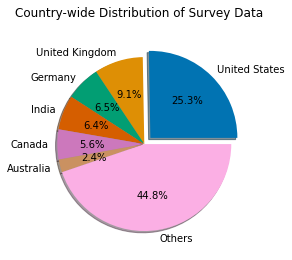

In [16]:
filter_and_draw_pie(df)

## Bubble plot of Job Satisfaction vs Career Satisfaction

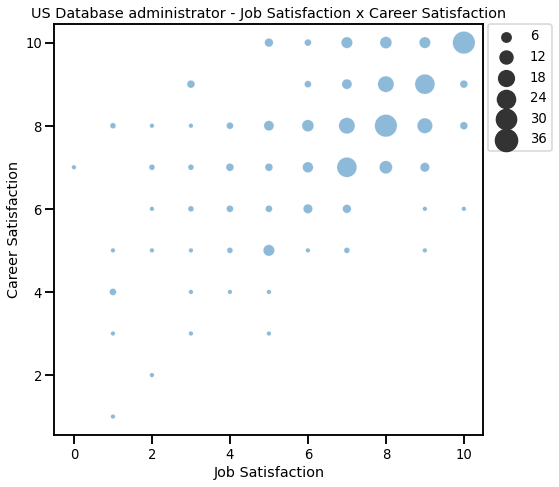

In [17]:
# Bubble plot of Job Satisfaction x Career Satisfaction
# Set the parameters
cols_to_select = ['Job Satisfaction', 'Career Satisfaction']

# Call scatter plot routine
dr_df = get_data_and_draw_bubble(js_df, cols_to_select);

## Q1: Does job satisfaction depend on the type of organization?
- For all Organization Types, find average Job Satisfaction of their employees
- Note: Only US resident full-time Database administrators data to be used for answering this question 

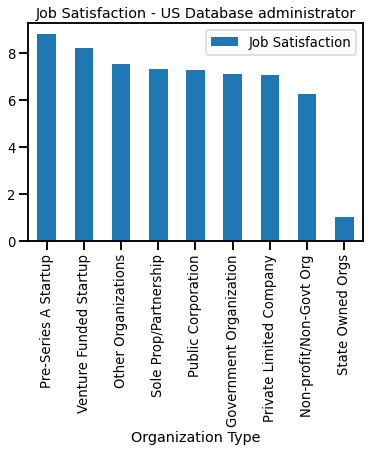

In [18]:
sum_df = filter_and_draw_bar(js_df) 

## Q1: Answers

In [19]:
print('Yes, it does! From the bar plot above it is clear that Job Satisfaction varies significantly by Organization Types.', \
'Organization Types with their average Job Satisfaction Ratings for US based full-time Database administrators are shown here:\n')
print(sum_df.to_csv(header=None, sep='\t'))


Yes, it does! From the bar plot above it is clear that Job Satisfaction varies significantly by Organization Types. Organization Types with their average Job Satisfaction Ratings for US based full-time Database administrators are shown here:

Pre-Series A Startup	8.8
Venture Funded Startup	8.2
Other Organizations	7.5
Sole Prop/Partnership	7.3
Public Corporation	7.3
Government Organization	7.1
Private Limited Company	7.1
Non-profit/Non-Govt Org	6.2
State Owned Orgs	1.0



## Q2: Is there any correlation between salary and job satisfaction?
Note: Only US resident full-time Database administrators data to be used for answering this question.

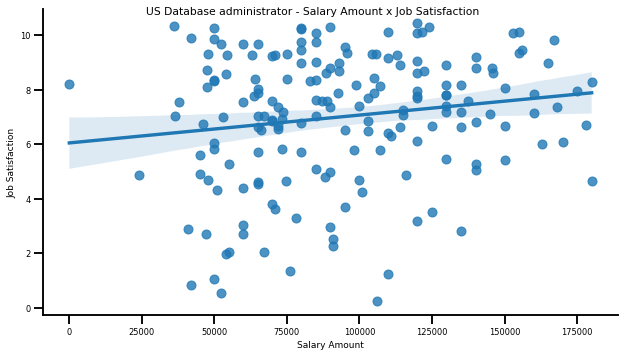

In [20]:
# Gather data as necessary for answering the current question and print

# Set the parameters
cols_to_select = ['Salary Amount', 'Job Satisfaction']

# Call scatter plot routine
corr_val = get_data_and_draw_scatter(js_df, cols_to_select);


## Q2: Answers

In [21]:
print_corr(cols_to_select, corr_val)


A positive correlation exists.

From the scatter plot with regression line, we can see that US Database administrator's Salary Amount and Job Satisfaction are positively correlated.

Correlation Coefficient =  0.16

A word of caution: Correlation does not necessarily imply Causation! Plese read our blog post on this topic for further details. TK: blog post url


## Q3: Does better Work Equipment lead to higher Job Satisfaction?


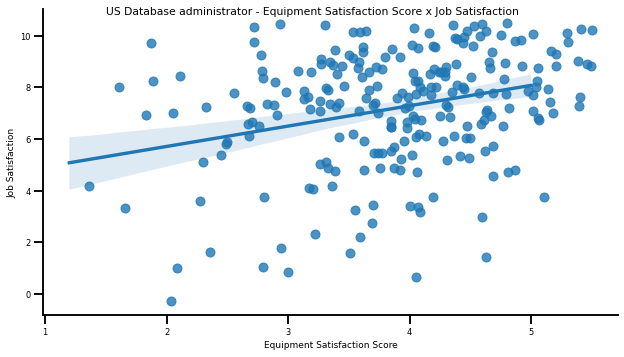

In [22]:
# Scatter plot with trend line between Job Hunting Hours/week and Job Satisfaction

# Set the parameters
cols_to_select = ['Equipment Satisfaction Score', 'Job Satisfaction']

# Call scatter plot routine
corr_val = get_data_and_draw_scatter(js_df, cols_to_select);


## Q3: Answers

In [23]:
print_corr(cols_to_select, corr_val)


A positive correlation exists.

From the scatter plot with regression line, we can see that US Database administrator's Equipment Satisfaction Score and Job Satisfaction are positively correlated.

Correlation Coefficient =  0.29

A word of caution: Correlation does not necessarily imply Causation! Plese read our blog post on this topic for further details. TK: blog post url


## Q4: When an employer trusts its employees, does that benefit the employer too?

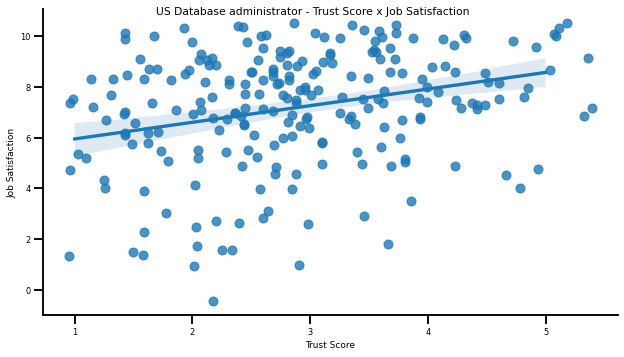

In [24]:
# Scatter plot with trend line between Job Hunting Hours/week and Job Satisfaction

# Set the parameters
cols_to_select = ['Trust Score', 'Job Satisfaction']

# Call scatter plot routine
corr_val = get_data_and_draw_scatter(js_df, cols_to_select);


## Q4: Answers

In [25]:
print_corr(cols_to_select, corr_val)


A positive correlation exists.

From the scatter plot with regression line, we can see that US Database administrator's Trust Score and Job Satisfaction are positively correlated.

Correlation Coefficient =  0.28

A word of caution: Correlation does not necessarily imply Causation! Plese read our blog post on this topic for further details. TK: blog post url


## End of Notebook